### Fetch Data

In [1]:
from clients.tradingview import TV, Interval

# Fetch VIX data
vix_data = TV.get_hist(
            symbol="VIX", exchange="TVC", interval=Interval.in_daily, n_bars=100
        )

vix_data.index = vix_data.index.date

# Fetch S&P 500 data
es_data = TV.get_hist(
            symbol="ES1!", exchange="CME_MINI", interval=Interval.in_daily, n_bars=100
        )

es_data.index = es_data.index.date

you are using nologin method, data you access may be limited


### Regression Model

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Merge data on date index
merged_data = vix_data[['close']].merge(es_data[['close']], left_index=True, right_index=True, suffixes=('_VIX', '_ES'))

# Calculate daily returns
merged_data['ES_return'] = merged_data['close_ES'].pct_change()

# Drop NaN values resulting from pct_change()
merged_data = merged_data.dropna()

# Regression model: SP500 levels ~ VIX levels
X = merged_data['close_VIX']
y = merged_data['ES_return']
X = sm.add_constant(X)  # Add constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ES_return   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.430
Date:                Sat, 31 Aug 2024   Prob (F-statistic):              0.235
Time:                        17:46:54   Log-Likelihood:                 253.42
No. Observations:                  78   AIC:                            -502.8
Df Residuals:                      76   BIC:                            -498.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.004      1.402      0.165      -0.002       0.014
close_VIX     -0.0003      0.000     -1.196      0.235      -0.001       0.000
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.434
Skew:                           0.166   Prob(JB):                        0.805
Kurtosis:                       3.155   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Regression

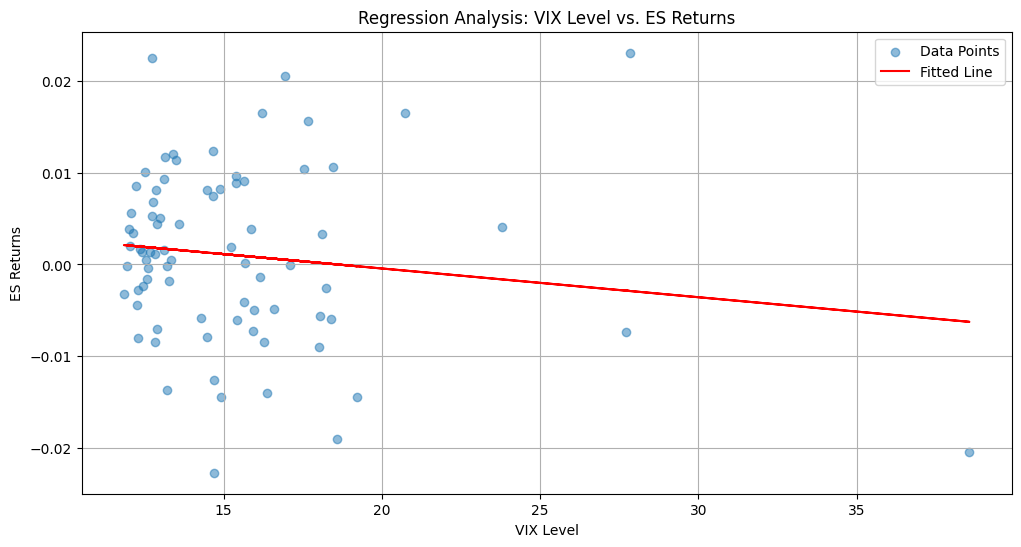

In [25]:
# Plot the regression
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['close_VIX'], y, alpha=0.5, label='Data Points')
plt.plot(merged_data['close_VIX'], predictions, color='red', label='Fitted Line')
plt.xlabel('VIX Level')
plt.ylabel('ES Returns')
plt.title('Regression Analysis: VIX Level vs. ES Returns')
plt.legend()
plt.grid(True)
plt.show()